#Extract the data

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ivansher/nasa-nearest-earth-objects-1910-2024")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ivansher/nasa-nearest-earth-objects-1910-2024/versions/2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Specify the path to your file in Google Drive
dataset = pd.read_csv(path + '/nearest-earth-objects(1910-2024).csv')
dataset.shape

(338199, 9)

#Explore the data

In [3]:
dataset.head(5)

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [4]:
dataset.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [6]:
dataset.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,28
estimated_diameter_min,28
estimated_diameter_max,28
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [7]:
# check what every column have
for col in dataset.columns:
    print( col,':', dataset[col].nunique())
    print(dataset[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

neo_id : 33514
neo_id
2277810     211
2469219     197
3678630     192
3771633     186
54353620    169
Name: count, dtype: int64

********************

name : 33514
name
277810 (2006 FV35)               211
469219 Kamo`oalewa (2016 HO3)    197
(2014 OL339)                     192
(2017 FZ2)                       186
(2023 FW13)                      169
Name: count, dtype: int64

********************

absolute_magnitude : 1778
absolute_magnitude
24.4    2208
26.1    2088
24.6    2083
25.5    2048
24.8    2038
Name: count, dtype: int64

********************

estimated_diameter_min : 1778
estimated_diameter_min
0.035039    2208
0.016016    2088
0.031956    2083
0.021113    2048
0.029144    2038
Name: count, dtype: int64

********************

estimated_diameter_max : 1778
estimated_diameter_max
0.078350    2208
0.035813    2088
0.071456    2083
0.047211    2048
0.065169    2038
Name: count, dtype: int64

********************

orbiting_body : 1
orbiting_body
Earth    338199
Name: count, dty

In [8]:
dataset.describe(include='object')

,name,orbiting_body
count,338199,338199
unique,33514,1
top,277810 (2006 FV35),Earth
freq,211,338199


In [9]:
dataset.duplicated().sum()

0

In [10]:
dataset.dtypes

,0
neo_id,int64
name,object
absolute_magnitude,float64
estimated_diameter_min,float64
estimated_diameter_max,float64
orbiting_body,object
relative_velocity,float64
miss_distance,float64
is_hazardous,bool


#Data cleaning

In [11]:
dataset.dropna(inplace=True)

In [12]:
# Dropping unnecessary columns: 'neo_id', 'name', and 'orbiting_body' from the dataset.
dataset.drop(columns=['neo_id', 'name', 'orbiting_body'], inplace=True)

In [13]:
# Delete duplicate rows
dataset.drop_duplicates(inplace=True)

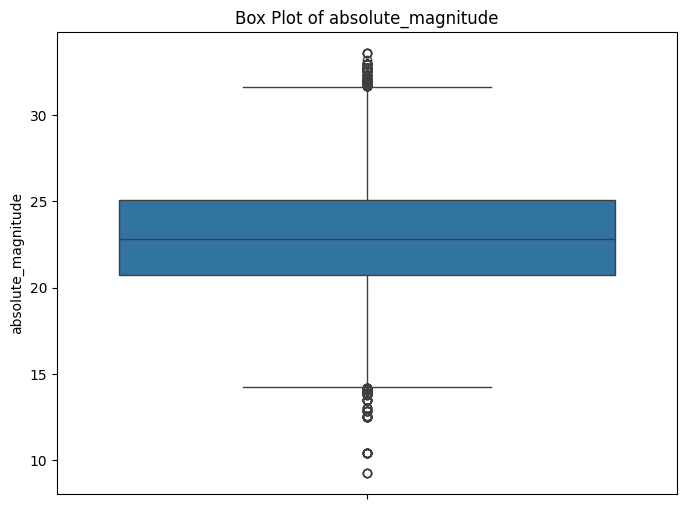

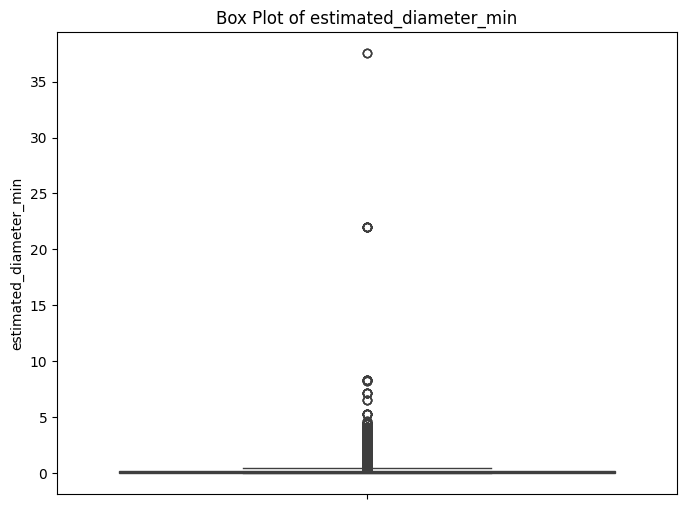

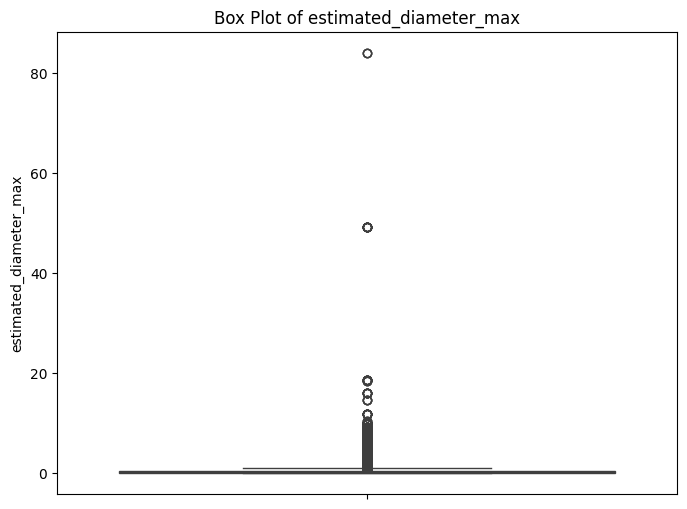

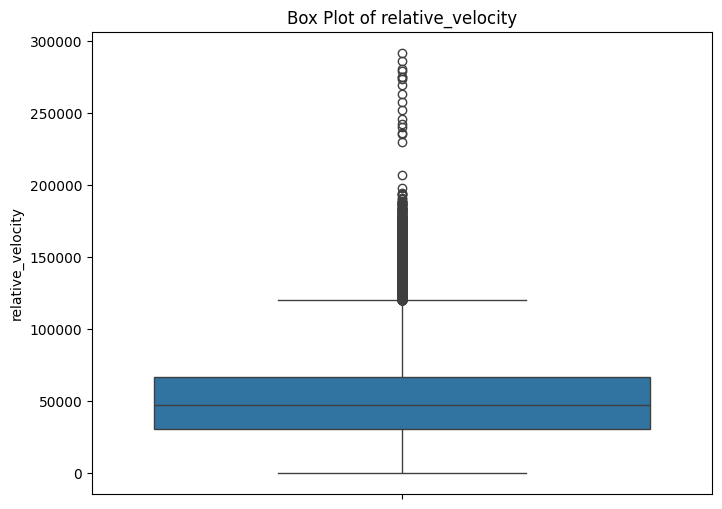

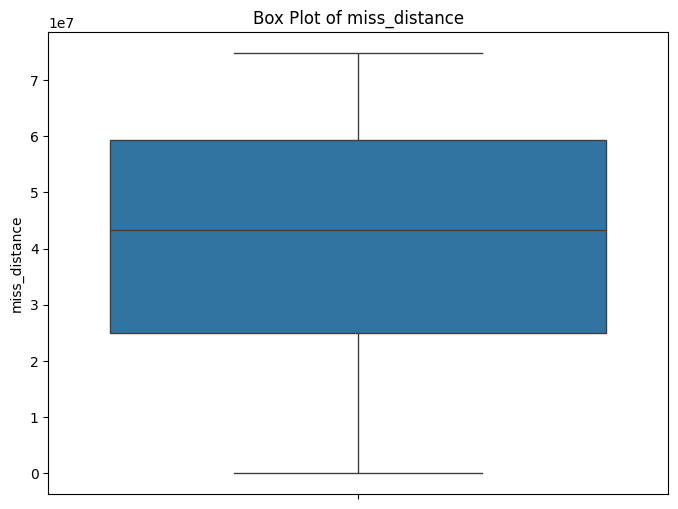

In [14]:
# This loop iterates through all numerical columns in the dataset and creates a box plot for each.
# Box plots help visualize the distribution of data and detect outliers.

for col in dataset.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=dataset[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [15]:
# This function handles outliers by removing values outside the interquartile range (IQR).
# It calculates the lower and upper bounds and filters the dataframe to only include values within these bounds.

def handle_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df

In [16]:
# Iterating through all numerical columns in the dataset and removing outliers using the handle_outliers function.

for col in dataset.select_dtypes(include=np.number).columns:
  dataset = handle_outliers(dataset, col)

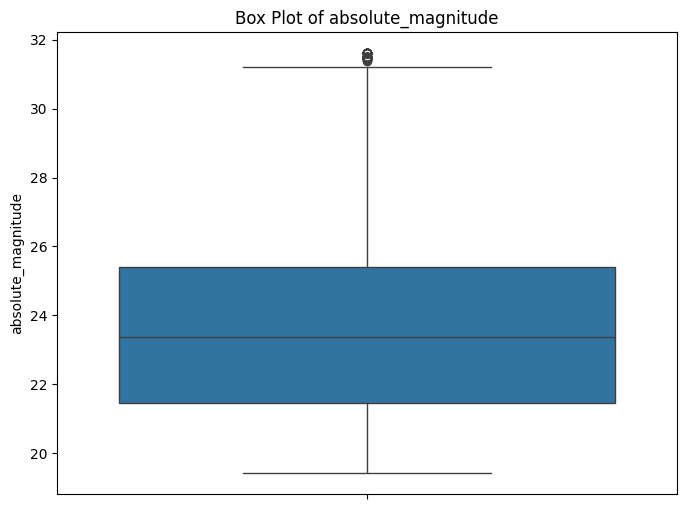

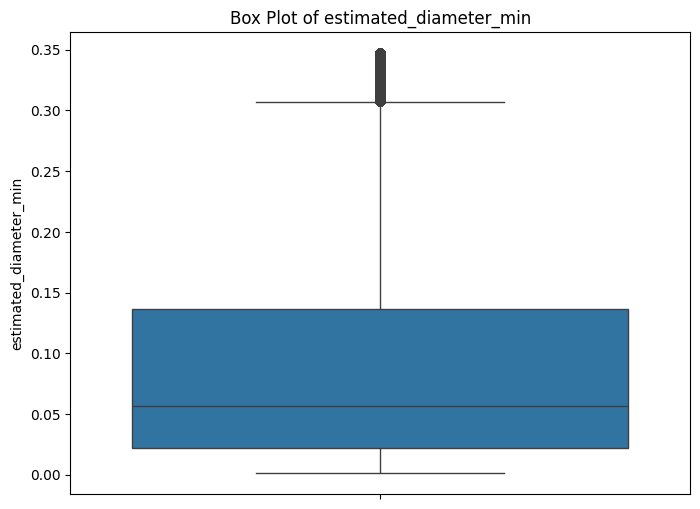

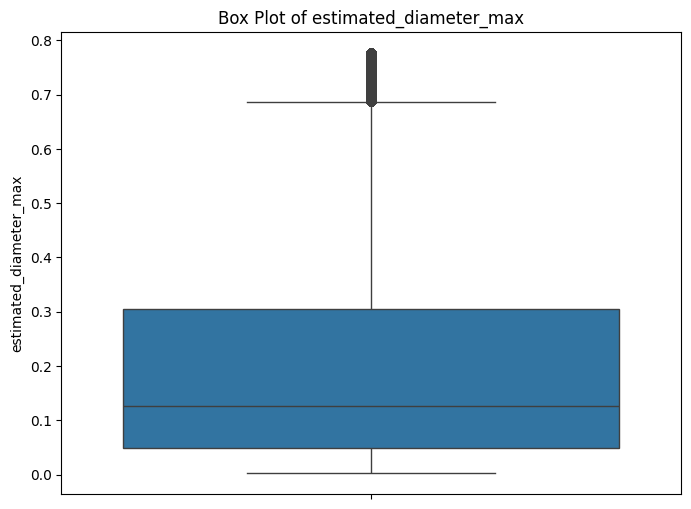

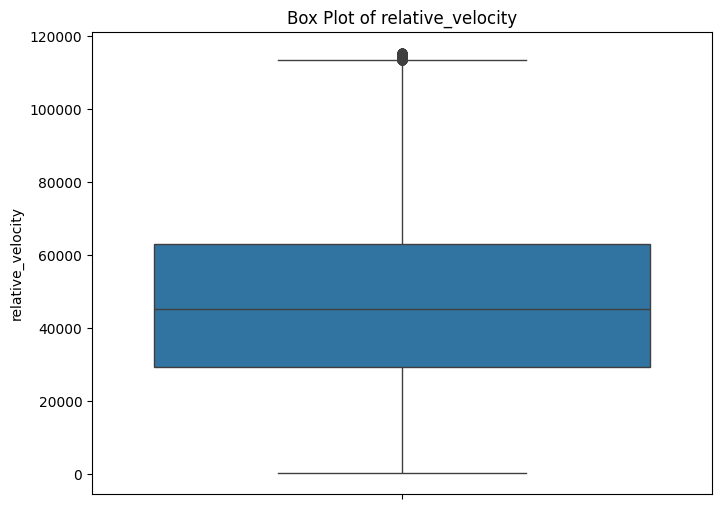

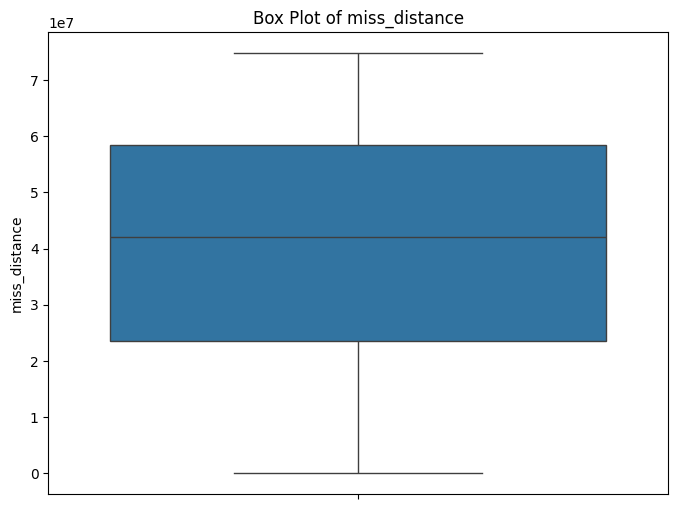

In [17]:
# This loop iterates through all numerical columns in the dataset and creates a box plot for each.
# Box plots help visualize the distribution of data and detect outliers.

for col in dataset.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=dataset[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [18]:
dataset.shape

(295768, 6)

In [19]:
dataset.head(5)

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False
5,25.00,0.026580,0.059435,47477.649832,4.290521e+07,False
6,21.50,0.133216,0.297879,57853.295346,2.727908e+07,True


In [20]:
dataset.duplicated().sum()

0

In [21]:
dataset.isnull().sum()

,0
absolute_magnitude,0
estimated_diameter_min,0
estimated_diameter_max,0
relative_velocity,0
miss_distance,0
is_hazardous,0


#EDA

In [22]:
dataset.describe()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,295768.000000,295768.000000,295768.000000,295768.000000,2.957680e+05
mean,23.548486,0.089345,0.199782,47635.923929,4.054848e+07
std,2.493745,0.084844,0.189717,22971.416222,2.094713e+07
min,19.420000,0.001266,0.002832,203.346433,6.745533e+03
25%,21.450000,0.022108,0.049436,29345.053103,2.352594e+07
50%,23.360000,0.056566,0.126485,45112.081313,4.201143e+07
75%,25.400000,0.136319,0.304818,62946.977912,5.849414e+07
max,31.610000,0.347180,0.776319,115342.005052,7.479812e+07


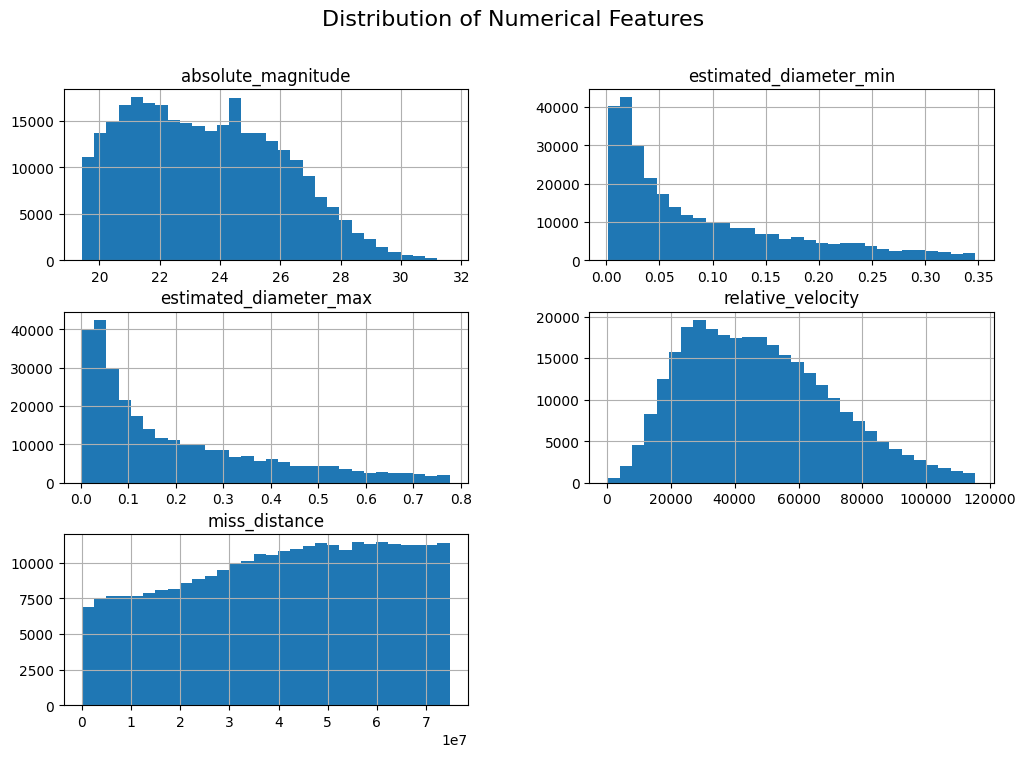

In [23]:
# Creating histograms for all numerical columns in the dataset to visualize the distribution of each feature.
# The plots use 30 bins and display the distribution patterns of the data.

dataset.hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

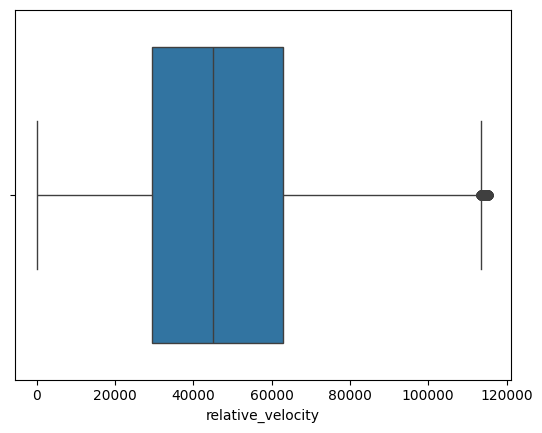

In [24]:
# Creating a box plot for the 'relative_velocity' column to visualize its distribution and identify any potential outliers.
sns.boxplot(x=dataset['relative_velocity'])
plt.show()

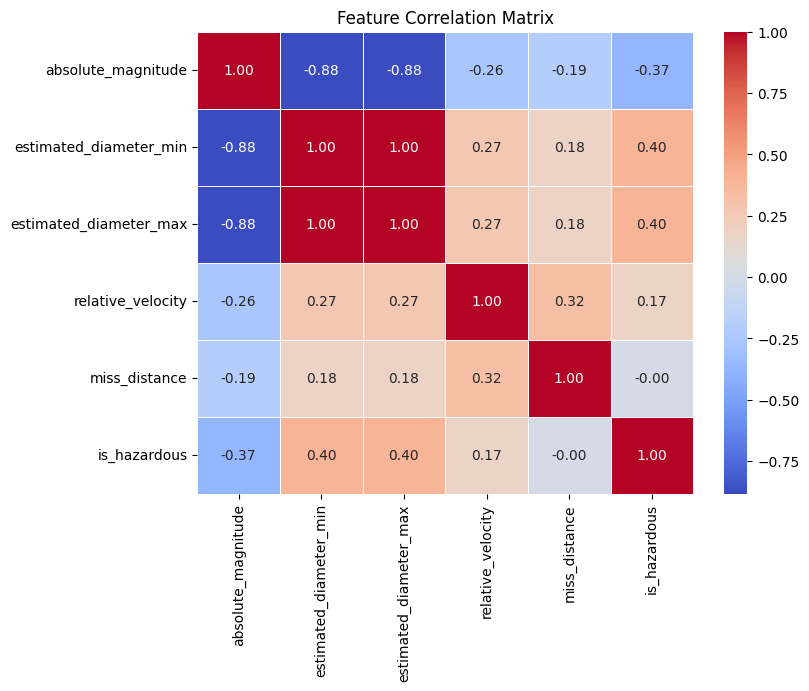

In [25]:
# Creating a heatmap to visualize the correlation matrix of the dataset.
# The heatmap shows the strength and direction of correlations between numerical features using color gradients.

plt.figure(figsize=(8, 6))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

#Data Preprocessing

In [26]:
dataset.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False
5,25.00,0.026580,0.059435,47477.649832,4.290521e+07,False
6,21.50,0.133216,0.297879,57853.295346,2.727908e+07,True


In [27]:
# Splitting the dataset into features (X) and target variable (y).
# 'X' contains all columns except 'is_hazardous', while 'y' is the target variable 'is_hazardous'.
# The shapes of X and y are printed to confirm the split.

X = dataset.drop(columns=['is_hazardous'])
y = dataset['is_hazardous']
print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (295768, 5)
y shape:  (295768,)


In [28]:
# Using SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes by generating synthetic samples.
# The resampled data (X_resampled and y_resampled) now have an equal distribution of classes, improving model training.

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)

X_resampled shape: (527158, 5)
y_resampled shape: (527158,)


In [29]:
X_resampled.duplicated().sum()

0

In [30]:
# Converting the resampled target variable (y_resampled) into a pandas Series.
# Printing the distribution of categories after applying SMOTE to verify the class balance.

y_resampled_series = pd.Series(y_resampled)
print("Category distribution after SMOTE:")
print(y_resampled_series.value_counts())

Category distribution after SMOTE:
is_hazardous
False    263579
True     263579
Name: count, dtype: int64


In [31]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (421726, 5)
y_train shape: (421726,)
X_test shape: (105432, 5)
y_test shape: (105432,)


In [32]:
# Using StandardScaler to standardize the feature data by scaling them to have a mean of 0 and a standard deviation of 1.
# The scaler is fit on the training data and then used to transform both the training and test sets.
# The shape of the scaled data is printed, and the first few rows of the scaled training data are displayed for inspection.

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_train_scaled_df.head()

X_train_scaled shape: (421726, 5)
X_test_scaled shape: (105432, 5)


,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
0,1.645249,-1.340949,-1.340949,0.018217,0.275442
1,-0.771724,0.809010,0.809010,1.291386,0.996655
2,0.674144,-1.020044,-1.020044,0.269094,-0.122873
3,-0.382847,0.019520,0.019520,0.496631,-0.062733
4,-0.433212,0.103808,0.103808,0.844135,1.278395


#Model Training and Evaluation

In [33]:
# Training a RandomForestClassifier model on the scaled training data (X_train_scaled) and the corresponding target labels (y_train).
# The random_state is set for reproducibility of the results.

model = RandomForestClassifier(random_state=42)

model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Making predictions using the test data (X_test_scaled) with the trained RandomForestClassifier model.
# Evaluating the model's performance using the classification report (which includes precision, recall, and F1-score) and confusion matrix.

y_pred = model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.96      0.96     52661
        True       0.96      0.95      0.96     52771

    accuracy                           0.96    105432
   macro avg       0.96      0.96      0.96    105432
weighted avg       0.96      0.96      0.96    105432

Confusion Matrix:
[[50565  2096]
 [ 2375 50396]]


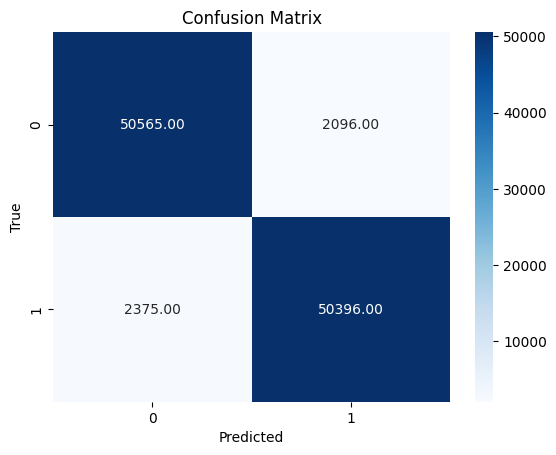

In [35]:
# Creating and visualizing the confusion matrix using a heatmap to show the performance of the model.
# The heatmap displays the true vs. predicted values with annotations for better clarity.

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()